<p><font size="6" color='grey'> <b>

Generative KI. Verstehen. Anwenden. Gestalten.
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
LangChain 101
</b></font> </br></p>

---

In [ ]:
#@title 🔧 Umgebung einrichten{ display-mode: "form" }
!uv pip install --system -q git+https://github.com/ralf-42/GenAI.git#subdirectory=04_modul
from genai_lib.utilities import (
    check_environment,
    get_ipinfo,
    setup_api_keys,
    mprint,
    install_packages,
    mermaid,
    get_model_profile,
    extract_thinking,
    load_prompt
)
setup_api_keys(['OPENAI_API_KEY'], create_globals=False)
print()
check_environment()
print()
get_ipinfo()

✓ OPENAI_API_KEY erfolgreich gesetzt

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Installierte LangChain- und LangGraph-Bibliotheken:
langchain                                1.2.8
langchain-chroma                         1.1.0
langchain-classic                        1.0.1
langchain-community                      0.4.1
langchain-core                           1.2.9
langchain-ollama                         1.0.1
langchain-openai                         1.1.8
langchain-text-splitters                 1.1.0
langgraph                                1.0.7
langgraph-checkpoint                     4.0.0
langgraph-prebuilt                       1.0.7
langgraph-sdk                            0.3.3

IP-Adresse: 34.125.145.78
Hostname: 78.145.125.34.bc.googleusercontent.com
Stadt: Las Vegas
Region: Nevada
Land: US
Koordinaten: 36.1750,-115.1372
Provider: AS396982 Google LLC
Postleitzahl: 89111
Zeitzone: America/Los_Angeles


<p><font color='black' size="5">
⏸️ 5-Minuten-Check:
</font></p>

**Ziel:** Prüfen, ob du das vorherige Kapitel verstanden hast – nicht, ob es gerade läuft.

**Aufgabe** (5 Minuten, ohne Vorlage):

Rekonstruiere die zentrale Idee oder Code-Struktur des letzten Abschnitts selbstständig
(kein Copy & Paste, kein Nachschlagen).

Wähle eine der folgenden Optionen:

+ Erkläre in 1–2 Sätzen, was hier konzeptionell passiert.

+ Verändere eine Kleinigkeit (z. B. Prompt, Parameter, Reihenfolge) und beschreibe die Auswirkung.

+ Markiere eine Stelle, die du nicht sicher erklären kannst, und formuliere eine konkrete Frage dazu.

**Hinweis:**
Nicht alles muss „fertig“ oder „korrekt“ sein. Entscheidend ist, wo dein Verständnis gerade endet

# 1 | Was ist LangChain?
---

LangChain ist ein Framework zur **Entwicklung von Anwendungen mit großen Sprachmodellen** (LLMs). Es vereinfacht die Integration von LLMs in eigene Anwendungen durch:

- Modulare Komponenten für verschiedene Aufgaben
- Vorgefertigte Ketten (Chains) für komplexe Workflows
- Einfache Integration externer Datenquellen
- Werkzeuge für das Speichern von Konversationskontexten



[Einführung](https://python.langchain.com/docs/introduction/)   
[Konzepte](https://python.langchain.com/docs/concepts/)   
[API-References](https://python.langchain.com/api_reference/index.html)   
[Integrations](https://python.langchain.com/docs/integrations/providers/)

---

[Tutorials](https://python.langchain.com/docs/tutorials/)   
[How-to-Guides](https://python.langchain.com/docs/how_to/)   

# 2 | Überblick Konzepte
---




Die Darstellung veranschaulicht das Grundprinzip von LangChain: die Verkettung verschiedener Konzepte zu einem durchgängigen Verarbeitungsprozess, der Eingaben in strukturierte Ausgaben umwandelt.

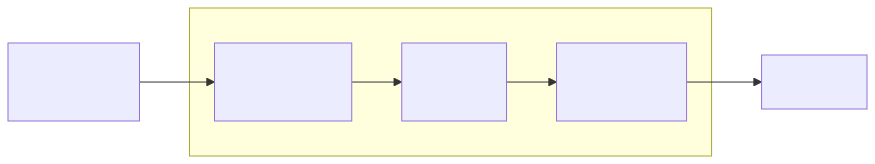

In [ ]:
#@title 🧜‍♀️ Prozess-Diagramm { display-mode: "form" }

diagram = """
flowchart LR
    Input["Input<br/>(Message)"] --> Prompt

    subgraph Chain
        Prompt["Prompt<br/>(Template)"]
        Model["Model<br/>(LLM)"]
        Response["Response<br/>(Parser)"]
        Prompt --> Model --> Response
    end

    Response --> Result["Result"]
"""
mermaid(diagram)

Konzepte von LangChain sind grundlegende Bausteine und Prinzipien. Hier sind einige der wichtigsten Konzepte:

+ Nachrichten (**Messages**): Kommunikationseinheiten in Chat-Modellen für Ein- und Ausgabe.
+ Prompt-Vorlagen (**Prompt template**s): Komponenten zur Erstellung strukturierter Prompts für LLMs.
+ Chat-Modelle (**Chat models**): LLMs, die über eine Chat-API verfügbar sind und Sequenzen von Nachrichten verarbeiten.
+ Chains (**Chains**): Verknüpfungen mehrerer LLMs oder anderer Komponenten für komplexere Anwendungen.
+ Strukturierte Ausgabe (**Structured output**): Technik, um Chat-Modelle in strukturierten Formaten antworten zu lassen.
+ Chat-Verlauf (**Chat history**): Eine Sequenz von Nachrichten, die eine Konversation darstellt.
+ Retrieval Augmented Generation (**RAG**): Technik zur Verbesserung von Sprachmodellen durch Kombination mit externen Wissensbasen.
+ Retriever (**Retriever**): Komponenten, die relevante Dokumente aus einer Wissensbasis abrufen.
+ Agenten (**Agents**): Nutzen Sprachmodelle, um Aktionssequenzen auszuwählen und mit externen Ressourcen zu interagieren.
+ Tools (**Tools**): Funktionen mit definierten Schemata für Name, Beschreibung und Argumente.


# 3 | Nachrichten-Typen
---

Beim Einsatz von Large Language Models (LLMs) wie GPT gibt es drei Hauptarten von Nachrichten (Messages), die die Interaktion mit dem Modell steuern. Diese Messages definieren, wie das Modell reagiert, welche Eingaben es erhält und welche Ausgaben es generiert.



**System Message:**   
Die `System Message` dient dazu, das **Verhalten des LLMs** zu steuern. Sie ist eine nicht sichtbare Nachricht, die dem Modell Anweisungen gibt, wie es sich verhalten soll. Dabei kann sie die Persönlichkeit, den Tonfall und die Einschränkungen des Modells beeinflussen. Die Systemnachricht funktioniert wie eine Art "Rollenspiel-Anweisung", um das Modell in eine gewünschte Rolle zu versetzen.

*Merkmale:*
- Definiert, wie das Modell reagieren soll
- Legt Persönlichkeit, Verhalten und Einschränkungen fest
- Wird zu Beginn einer Sitzung gesetzt und bleibt bestehen
- Nicht sichtbar für den Benutzer

*Beispiel einer System Message:*
```json
{
  "role": "system",
  "content": "Du bist ein KI-Assistent, der präzise und informative Antworten in einem professionellen Ton liefert."
}
```
Dieses Beispiel weist das Modell an, in einem professionellen Tonfall kurze und informative Antworten zu geben.

---



**User Message**   
Die `User Message` ist die eigentliche **Eingabe des Benutzer**s. Sie kann eine Frage, eine Aufforderung, kontextrelevanten Inhalt oder ein Befehl sein. Das Modell nutzt diese Nachricht als Ausgangspunkt für die Generierung einer Antwort.

*Merkmale:*
- Direkte Eingabe des Benutzers
- Kann eine Frage, Aufforderung, kontextrelevanten Inhalt oder einen Befehl enthalten
- Basis für die Antwort des Modells

*Beispiel einer User Message:*
```json
{
  "role": "user",
  "content": "Was sind die wichtigsten Unterschiede zwischen KI und maschinellem Lernen?"
}
```
Hier fragt der Benutzer nach den Unterschieden zwischen KI und maschinellem Lernen.

---


**AI Message**   
Die `AI Message` ist die **Antwort, die das Modell generiert**. Sie basiert auf der User Message und den Anweisungen aus der System Message. Die AI Message kann verschiedene Eigenschaften haben, ist aber hauptsächlich auf den Inhalt fokussiert.

*Merkmale:*
- Antwort des Modells auf die Benutzeranfrage
- Kann verschiedene Eigenschaften haben (z. B. Länge, Stil)
- Hauptsächlich inhaltlich relevant

*Beispiel einer AI Message:*
```json
{
  "role": "assistant",
  "content": "Künstliche Intelligenz (KI) ist ein weites Feld, das verschiedene Teilgebiete umfasst, darunter auch das maschinelle Lernen (ML). ML konzentriert sich auf die Erstellung von Modellen, die aus Daten lernen und Vorhersagen treffen."
}
```
Hier gibt das Modell eine inhaltliche Antwort auf die Frage des Benutzers.




**System-Message vs. User-Message**



*System-Message*

**Funktion:** Persistente Verhaltensregeln über verschiedene Aufgaben hinweg

**Enthält:**
- Identität & Rolle des Modells
- Grundsätzliche Methodik & Denkansatz
- Durchgängige Qualitätsstandards
- Tool-/Methodenkompetenz
- Generische Few-Shot-Examples

**Metapher:** Das Betriebssystem – selten verändert, verhaltensbestimmend





*User-Message*

**Funktion:** Konkrete Aufgabe und spezifischer Kontext für diese Interaktion

**Enthält:**
- Situativer Kontext & Hintergrund
- Klare Aufgabenstellung
- Erwartete Format/Umfang/Detailgrad
- Spezifische Daten & Randbedingungen
- Aufgabenspezifische Verhaltensanpassungen

**Metapher:** Die Arbeitsanweisung – variiert bei jeder Anfrage



**Kurz gefasst**   

+  **System Message** legt die Regeln und das Verhalten des Modells fest.
+ **User Message** stellt eine Anfrage oder einen Befehl.
+ **AI Message** gibt die generierte Antwort basierend auf den vorherigen Nachrichten.




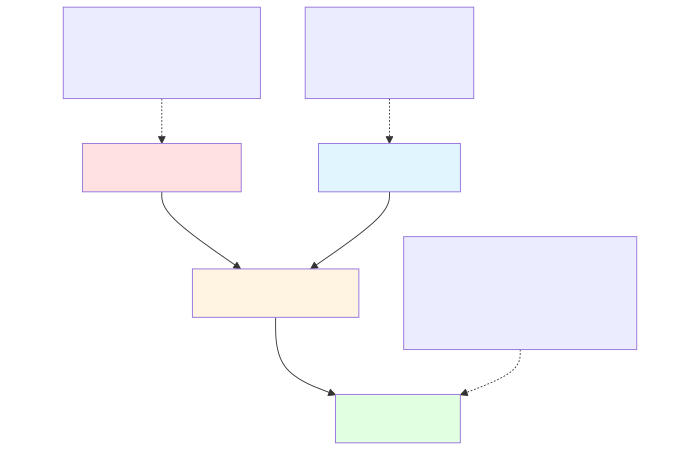

In [ ]:
#@markdown   <p><font size="4" color='green'>  🧜‍♀️ Mermaid - Message-Typen Workflow</font> </br></p>

diagram = """
graph TD
    A["System Message"] --> D["LLM Verarbeitung"]
    B["User Message"] --> D
    D --> C["AI Message"]

    A1["Definiert Verhalten<br/>Rolle & Persönlichkeit<br/>Einschränkungen"] -.-> A
    B1["Benutzer-Eingabe<br/>Frage oder Befehl<br/>Kontext"] -.-> B
    C1["Generierte Antwort<br/>Basierend auf System + User<br/>Strukturiertes Format"] -.-> C

    style A fill:#ffe1e1
    style B fill:#e1f5ff
    style C fill:#e1ffe1
    style D fill:#fff4e1
"""
mermaid(diagram, width=700, height=450)

# 4 | Ein einfaches Modell
---


In [ ]:
# Importe
from langchain.chat_models import init_chat_model
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langchain_core.prompts.few_shot import FewShotPromptTemplate
from langchain_core.output_parsers.string import StrOutputParser

In [ ]:
# Modell definieren (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0.0)

# 5 | Prompts
---

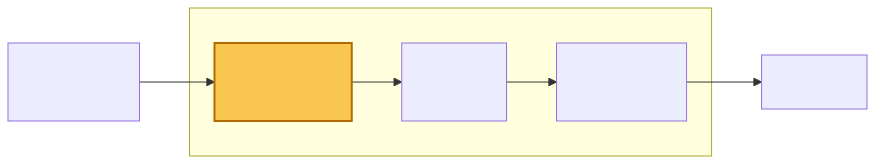

In [ ]:
#@title 🧜‍♀️ Prozess-Diagramm { display-mode: "form" }

diagram = """
flowchart LR
    Input["Input<br/>(Message)"] --> Prompt

    subgraph Chain
        Prompt["Prompt<br/>(Template)"]
        Model["Model<br/>(LLM)"]
        Response["Response<br/>(Parser)"]
        Prompt --> Model --> Response
    end

    Response --> Result["Result"]

    %% HIGHLIGHT einer einzelnen Box
    style Prompt fill:#f9c74f,stroke:#b36b00,stroke-width:2px

"""
mermaid(diagram)



Prompts sind die Eingaben bzw. Aufträge an das LLM. LangChain bietet verschiedene Template-Systeme. Ein **Template** ist eine **Vorlage** – genauer gesagt ein Text mit **Platzhaltern**, die später durch echte Werte ersetzt werden.


Ein **PromptTemplate** ist eine Vorlage für einen Eingabetext, der an ein Sprachmodell geschickt wird.
Er enthält Platzhalter `{placeholder}`, die später mit Nutzereingaben oder Kontext befüllt werden.

**Templates machen die KI-Prompts:**

+ Wiederverwendbar (z. B. für viele Themen oder Fragen)

+ Strukturiert (z. B. mit Rollen und Anweisungen)

+ Dynamisch erweiterbar (mit Memory, Tools, etc.)

## 5.1 | Simple Prompt


<p><font color='darkblue' size="4">
<b>❗Hinweis:</b>
</font></p>
Ohne Memory-Management hat das Modell ein kurzes Gedächnis.


**Prompt wird als Zeichenkette übergeben:**

In [ ]:
# Aufruf
response = llm.invoke("Was ist Generative KI?")

In [ ]:
# Antwort
type(response)

langchain_core.messages.ai.AIMessage

In [ ]:
response

AIMessage(content='Generative KI, oder generative künstliche Intelligenz, bezieht sich auf eine Klasse von Algorithmen und Modellen, die in der Lage sind, neue Inhalte zu erzeugen. Diese Inhalte können in verschiedenen Formen vorliegen, darunter Texte, Bilder, Musik, Videos und mehr. Generative KI nutzt häufig Techniken des maschinellen Lernens, insbesondere neuronale Netzwerke, um Muster in bestehenden Daten zu erkennen und darauf basierend neue, ähnliche Daten zu generieren.\n\nEin bekanntes Beispiel für generative KI sind Sprachmodelle wie GPT (Generative Pre-trained Transformer), die in der Lage sind, menschenähnliche Texte zu schreiben, Fragen zu beantworten oder Geschichten zu erzählen. In der Bildgenerierung gibt es Modelle wie DALL-E oder Midjourney, die aus Textbeschreibungen Bilder erstellen können.\n\nGenerative KI hat viele Anwendungen, darunter:\n\n1. **Kreative Inhalte**: Erstellung von Kunst, Musik, Literatur und Design.\n2. **Datenaugmentation**: Generierung zusätzliche

In [ ]:
for r in response:
    print(r)

('content', 'Generative KI, oder generative künstliche Intelligenz, bezieht sich auf eine Klasse von Algorithmen und Modellen, die in der Lage sind, neue Inhalte zu erzeugen. Diese Inhalte können in verschiedenen Formen vorliegen, darunter Texte, Bilder, Musik, Videos und mehr. Generative KI nutzt häufig Techniken des maschinellen Lernens, insbesondere neuronale Netzwerke, um Muster in bestehenden Daten zu erkennen und darauf basierend neue, ähnliche Daten zu generieren.\n\nEin bekanntes Beispiel für generative KI sind Sprachmodelle wie GPT (Generative Pre-trained Transformer), die in der Lage sind, menschenähnliche Texte zu schreiben, Fragen zu beantworten oder Geschichten zu erzählen. In der Bildgenerierung gibt es Modelle wie DALL-E oder Midjourney, die aus Textbeschreibungen Bilder erstellen können.\n\nGenerative KI hat viele Anwendungen, darunter:\n\n1. **Kreative Inhalte**: Erstellung von Kunst, Musik, Literatur und Design.\n2. **Datenaugmentation**: Generierung zusätzlicher Trai

In [ ]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Generative KI, oder generative künstliche Intelligenz, bezieht sich auf eine Klasse von Algorithmen und Modellen, die in der Lage sind, neue Inhalte zu erzeugen. Diese Inhalte können in verschiedenen Formen vorliegen, darunter Texte, Bilder, Musik, Videos und mehr. Generative KI nutzt häufig Techniken des maschinellen Lernens, insbesondere neuronale Netzwerke, um Muster in bestehenden Daten zu erkennen und darauf basierend neue, ähnliche Daten zu generieren.

Ein bekanntes Beispiel für generative KI sind Sprachmodelle wie GPT (Generative Pre-trained Transformer), die in der Lage sind, menschenähnliche Texte zu schreiben, Fragen zu beantworten oder Geschichten zu erzählen. In der Bildgenerierung gibt es Modelle wie DALL-E oder Midjourney, die aus Textbeschreibungen Bilder erstellen können.

Generative KI hat viele Anwendungen, darunter:

1. **Kreative Inhalte**: Erstellung von Kunst, Musik, Literatur und Design.
2. **Datenaugmentation**: Generierung zusätzlicher Trainingsdaten für maschinelles Lernen.
3. **Simulationen**: Erzeugung realistischer Szenarien für Training und Forschung.
4. **Personalisierung**: Anpassung von Inhalten an individuelle Nutzerpräferenzen.

Die Technologie wirft jedoch auch ethische und rechtliche Fragen auf, insbesondere in Bezug auf Urheberrecht, Fälschungen und die potenzielle Verbreitung von Fehlinformationen.

In [ ]:
# Aufruf
response = llm.invoke("Was war meine letzte Frage?")

In [ ]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Es tut mir leid, aber ich kann keine vorherigen Interaktionen oder Fragen speichern oder abrufen. Wie kann ich Ihnen heute helfen?

**Prompt wird als formatierte String-Variable übergeben:**

In [ ]:
# f-String für simple prompt mit template
thema = "Machine Learning"
prompt = f"Erkläre {thema} in einfachen Worten."

In [ ]:
# Aufruf
response = llm.invoke(prompt)

In [ ]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Machine Learning, oder maschinelles Lernen, ist ein Teilbereich der Künstlichen Intelligenz, der es Computern ermöglicht, aus Daten zu lernen und Muster zu erkennen, ohne dass sie dafür explizit programmiert werden müssen. 

Stell dir vor, du hast viele Bilder von Katzen und Hunden. Anstatt einem Computer genau zu sagen, wie eine Katze oder ein Hund aussieht, zeigst du ihm einfach viele Beispiele. Der Computer analysiert diese Bilder und lernt, die Unterschiede zu erkennen. Nach einer Weile kann er dann selbstständig entscheiden, ob ein neues Bild eine Katze oder einen Hund zeigt.

Im Grunde genommen geht es beim maschinellen Lernen darum, dass Computer aus Erfahrungen lernen, ähnlich wie Menschen, und dadurch besser in bestimmten Aufgaben werden.

**Prompt wird als template übergeben:**

In [ ]:
# Einfaches Template mit Platzhaltern
simple_prompt_template = PromptTemplate.from_template(
    "Erkläre {thema} in einfachen Worten."
)

In [ ]:
# Prompt-Erstellung
thema = "Generative KI"
prompt = simple_prompt_template.format(thema=thema)
prompt

'Erkläre Generative KI in einfachen Worten.'

In [ ]:
# Aufruf
response = llm.invoke(prompt)

In [ ]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Generative KI ist eine Art von künstlicher Intelligenz, die in der Lage ist, neue Inhalte zu erstellen. Das können Texte, Bilder, Musik oder sogar Videos sein. Sie funktioniert, indem sie aus großen Mengen von Daten lernt, wie bestimmte Inhalte aussehen oder klingen. 

Stell dir vor, du hast viele Bilder von Katzen und Hunden. Eine generative KI kann lernen, wie diese Tiere aussehen, und dann ein ganz neues Bild von einem Tier erstellen, das es noch nie zuvor gegeben hat. 

Im Grunde genommen ist generative KI wie ein kreativer Computer, der neue Ideen und Inhalte basierend auf dem, was er gelernt hat, entwickeln kann.

## 5.2 | ChatPromptTemplate 📌

Das **ChatPromptTemplate** ist eine spezielle Prompt-Vorlage für Chatmodelle (z. B. GPT-3.5, GPT-4), die **mehrere Rollen und Nachrichten** unterstützt – also genau das, was Chat-Modelle eigentlich brauchen.

Es gehört zur LangChain-Bibliothek und baut auf dem Prinzip auf:


**Wer sagt was? → system, user, assistant, etc.**

In LangChain unterstützte Rollen:

+ "system" - für Systemnachrichten
+ "assistant" oder "ai" - für Assistenten-/KI-Antworten
+ "user" oder "human" - für Benutzernachrichten

<p><font color='black' size="5">
Variante 1: Liste & Tupel 📌
</font></p>

In [ ]:
# Template als Liste & Tupel
chat_template = ChatPromptTemplate.from_messages([
    ("system", "{system_prompt}"),
    ("human", "Erkläre mir {thema}"),
])

In [ ]:
# Variablen zuweisen
system_prompt = "Du bist ein hilfreicher und humorvoller Assistent."
thema = "Machine Learning"

In [ ]:
# Template & Variablen kombinieren
prompt = chat_template.format_messages(system_prompt=system_prompt, thema=thema)

In [ ]:
# Sprachmodell aufrufe
response = llm.invoke(prompt)

In [ ]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Klar, ich erkläre dir Machine Learning! 

Stell dir vor, du hast einen Hund, der nicht weiß, wie man „Sitz“ macht. Du zeigst ihm immer wieder, was er tun soll, und wenn er es richtig macht, gibst du ihm ein Leckerli. Nach einer Weile lernt der Hund, dass „Sitz“ bedeutet, sich hinzusetzen, um das Leckerli zu bekommen. 

Machine Learning funktioniert ähnlich, aber anstelle von Hunden und Leckerlis arbeiten wir mit Computern und Daten. Es ist ein Teilbereich der Künstlichen Intelligenz, bei dem Computer aus Erfahrungen (Daten) lernen, ohne explizit programmiert zu werden.

Hier sind die grundlegenden Schritte:

1. **Daten sammeln**: Du brauchst eine Menge Daten, die das Problem beschreiben, das du lösen möchtest. Das können Bilder, Texte, Zahlen oder alles Mögliche sein.

2. **Modell wählen**: Du wählst ein Modell aus, das die Beziehung zwischen den Daten und dem gewünschten Ergebnis lernen soll. Das kann ein einfaches lineares Modell oder ein komplexes neuronales Netzwerk sein.

3. **Training**: Du fütterst das Modell mit den gesammelten Daten und lässt es lernen. Dabei passt es seine internen Parameter an, um die besten Vorhersagen zu treffen.

4. **Testen**: Du überprüfst, wie gut das Modell funktioniert, indem du es mit neuen, unbekannten Daten testest. So siehst du, ob es wirklich gelernt hat oder ob es nur auswendig gelernt hat (das nennt man Überanpassung).

5. **Anpassen und Optimieren**: Je nach den Ergebnissen kannst du das Modell anpassen, mehr Daten sammeln oder andere Techniken ausprobieren, um die Leistung zu verbessern.

6. **Einsatz**: Wenn das Modell gut funktioniert, kannst du es in der realen Welt einsetzen, um Vorhersagen zu treffen oder Entscheidungen zu unterstützen.

Und das ist im Grunde genommen Machine Learning! Es ist wie das Training eines Hundes, nur dass der Hund ein Computer ist und die Leckerlis Daten sind. Wenn du noch mehr Fragen hast oder etwas genauer wissen möchtest, sag einfach Bescheid! 🐶💻

**... oder ...**

<p><font color='black' size="5">
Variante 2: Liste & Dictionary
</font></p>

In [ ]:
# Template als Liste & Dictionary
chat_template = ChatPromptTemplate.from_messages([
    {"role": "system", "content": "Du bist ein hilfreicher und humorvoller Assistent."},
    {"role": "human", "content": "Erkläre mir {thema}"},
])

In [ ]:
# Variablen zuweisen
system_prompt = "Du bist ein hilfreicher und humorvoller Assistent."
thema = "Machine Learning"

In [ ]:
# Template & Variablen kombinieren
prompt = chat_template.format_messages(system_prompt=system_prompt, thema=thema)

In [ ]:
# Sprachmodell aufrufe
response = llm.invoke(prompt)

In [ ]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Klar, ich erkläre dir gerne Machine Learning! 

Stell dir vor, du hast einen Roboterfreund, der lernen möchte, wie man Äpfel von Orangen unterscheidet. Anstatt ihm einfach zu sagen, was was ist, zeigst du ihm viele Bilder von Äpfeln und Orangen. Der Roboter schaut sich die Bilder an, merkt sich die Unterschiede und versucht, Muster zu erkennen. 

Machine Learning funktioniert ähnlich: Es ist ein Teilbereich der Künstlichen Intelligenz, bei dem Computer aus Daten lernen, ohne explizit programmiert zu werden. Stattdessen verwenden sie Algorithmen, um Muster in den Daten zu finden und Vorhersagen zu treffen oder Entscheidungen zu treffen.

Hier sind die grundlegenden Schritte:

1. **Daten sammeln**: Du brauchst eine Menge Daten, um deinem Modell beizubringen, was es lernen soll. Das können Bilder, Texte, Zahlen oder andere Informationen sein.

2. **Daten vorbereiten**: Die Daten müssen oft bereinigt und in ein passendes Format gebracht werden. Manchmal sind sie so chaotisch wie ein unordentliches Zimmer!

3. **Modell wählen**: Es gibt verschiedene Algorithmen, die du verwenden kannst, je nachdem, was du erreichen möchtest. Einige sind wie ein guter Koch, der verschiedene Rezepte ausprobiert, um das beste Gericht zu finden.

4. **Training**: Hier wird das Modell „trainiert“, indem es die Daten analysiert und lernt, Muster zu erkennen. Das ist wie das Üben für einen Wettbewerb – je mehr du übst, desto besser wirst du!

5. **Testen**: Nach dem Training wird das Modell mit neuen, unbekannten Daten getestet, um zu sehen, wie gut es gelernt hat. Wenn es gut abschneidet, ist das wie ein A+ in der Schule!

6. **Anpassen und Verbessern**: Manchmal muss man das Modell anpassen, um die Leistung zu verbessern. Das ist wie das Feintuning eines Instruments, um den perfekten Klang zu erreichen.

Machine Learning wird in vielen Bereichen eingesetzt, von der Spracherkennung über Bildverarbeitung bis hin zu Empfehlungen in Online-Shops. Es ist ein spannendes Feld, das ständig wächst und sich weiterentwickelt – fast so schnell wie die neuesten Internet-Memes! 

Wenn du noch mehr Fragen hast oder etwas genauer wissen möchtest, sag einfach Bescheid!


<p><font color='black' size="5">
Vergleich: f-string vs. PromptTemplate vs. ChatPromptTemplate
</font></p>



| Vorteil                      | `f-string` (Python)           | `PromptTemplate`              | `ChatPromptTemplate`            |
| ---------------------------- | ----------------------------- | ----------------------------- | ------------------------------- |
| 🚻 Rollenstruktur            | ❌ Keine Unterstützung         | ❌ Nur einfacher Text          | ✅ Klar: `system`, `user`, `ai`  |
| 📚 Konversationsaufbau       | ❌ Nicht geeignet              | ❌ Nicht geeignet              | ✅ Ideal für Multi-Turn-Dialoge <br>    (mehreren Gesprächsrunden)  |
| 🔄 Kombinierbar mit `Memory` | ❌ Nein                        | ❌ Nein                        | ✅ Ja, via `MessagesPlaceholder` |
| 🔌 Für Chatmodelle wie GPT   | ⚠️ Manuell als String         | ⚠️ Nur als Fließtext          | ✅ Nativ & strukturiert          |
| 🔍 Klarheit & Wartbarkeit    | ⚠️ Inline, schwer erweiterbar | ⚠️ Nur Inline-Text            | ✅ Saubere Message-Trennung      |
| 🧪 Prompt-Testbarkeit        | ❌ Keine Validierung           | ⚠️ Eingeschränkt               | ✅ Besser strukturiert           |
| ⚡ Performance                | ✅ Schnell & direkt            | ✅ Schnell                     | ✅ Schnell                       |
| 🔧 Validierung von Variablen | ❌ Keine                       | ✅ Automatisch                 | ✅ Automatisch                   |
| 🧩 Wiederverwendbarkeit      | ❌ Eingeschränkt               | ✅ Als Template-Objekt         | ✅ Als Template-Objekt           |
| 📝 Partial Variables         | ❌ Nein                        | ✅ Ja                          | ✅ Ja                            |
| 🔀 Chains & Pipelines        | ❌ Nicht integrierbar          | ✅ LangChain-kompatibel        | ✅ LangChain-kompatibel          |
| 🎯 Output Parser             | ❌ Manuell                     | ✅ Integrierbar                | ✅ Integrierbar                  |



**Anwendungsempfehlungen**

| Methode               | Wann verwenden?                                                                 |
| --------------------- | ------------------------------------------------------------------------------- |
| **f-string**          | Einfache, einmalige Prompts · Prototyping & schnelle Tests · Keine LangChain-Integration |
| **PromptTemplate**    | Single-Turn Prompts mit Variablen · Completion-Modelle (GPT-3, etc.) · Keine Konversation |
| **ChatPromptTemplate** | Multi-Turn Dialoge · Chat-Modelle (GPT-4, Claude, etc.) · Komplexe Konversationen mit Memory |


## 5.3 | Few-Shot Prompt


Few-Shot-Prompting ist eine Technik, bei der man einem KI-Modell einige Beispiele (sogenannte "Shots") vorlegt, bevor es eine neue Aufgabe lösen soll. Das Modell kann aus diesen Beispielen das Muster erkennen und auf neue, ähnliche Fälle anwenden.

`FewShotPromptTemplate` ist eine Prompt-Vorlage, die automatisch mehrere Beispiele einfügt, bevor das eigentliche Nutzer-Input kommt.

In [ ]:
beispiele = [
    {"frage": "Was ist Python?", "antwort": "Eine interpretierende Programmiersprache."},
    {"frage": "Was ist Java?", "antwort": "Eine objektorientierte Sprache."}
]

In [ ]:
beispiel_prompt_template = PromptTemplate.from_template(
    "Frage: {frage}\nAntwort: {antwort}"
)

In [ ]:
system_prompt = "Du bist ein Assistent, der Fragen zu Programmiersprachen beantwortet. Halte deine Antworten kurz und präzise:"

In [ ]:
# Few-Shot-Prompt
few_shot_prompt_template = FewShotPromptTemplate(
    examples=beispiele,
    example_prompt=beispiel_prompt_template,
    prefix=system_prompt,
    suffix="Frage: {frage}\nAntwort:",
    input_variables=["frage"]
)

prompt = few_shot_prompt_template.format(frage="Was ist Go?")

**Struktur des finalen Prompts:**

```
[prefix]
[formatiertes Beispiel 1]
[formatiertes Beispiel 2]
...
[suffix mit aktueller Frage]
```



In [ ]:
response = llm.invoke(prompt)

In [ ]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Eine kompilierte Programmiersprache, die für Effizienz und Einfachheit entwickelt wurde.

**Vorteile eines `FewShotPromptTemplate`**

| Vorteil                      | Beschreibung                                                      |
| ---------------------------- | ----------------------------------------------------------------- |
| 🧠 Lerneffekt für das Modell | Das Modell erkennt aus Beispielen, wie es antworten soll          |
| 🧰 Flexibilität              | Beispiele können dynamisch gesetzt oder generiert werden          |
| 🧱 Struktur & Konsistenz     | Einheitlicher Aufbau aller Beispiele über `example_prompt`        |
| 🪄 Kein Training nötig       | Kein Fine-Tuning – nur durch Prompting                            |
| 🛠 Kombinierbar              | Kann mit Templates, Tools, Chains, OutputParser kombiniert werden |


## 5.4 | Eigenes Prompt-Template 📌

Die `load_prompt()` Funktion aus der `genai_lib.utilities` ermöglicht das Laden von Prompt-Templates direkt von GitHub oder aus lokalen Dateien.

**Vorteile:**
- Zentrale Verwaltung von Prompts im `05_prompt/` Verzeichnis
- Wiederverwendbarkeit über mehrere Notebooks hinweg
- Versionskontrolle durch Git
- Einfaches Teilen von Best-Practice-Prompts
- **Markdown-Format** für bessere Lesbarkeit und einfache Bearbeitung

**Modi:**
- `mode="T"` (default): Gibt ein `ChatPromptTemplate` zurück
- `mode="S"`: Gibt den Inhalt ohne Frontmatter als String zurück

**Hinweis:** In Google Colab muss die GitHub-URL verwendet werden, da lokale Pfade nicht verfügbar sind.

**Template-Struktur (`05_prompt/text_zusammenfassung.md`):**

```markdown
---
name: text_zusammenfassung
description: Erstellt prägnante Textzusammenfassungen
variables: [text]
---

## system

Du bist ein Experte für die Erstellung prägnanter Textzusammenfassungen...

## human

Bitte fasse den folgenden Text zusammen: {text}
```

**Format:** Templates werden als **Markdown-Dateien (.md)** mit YAML-Frontmatter erstellt. Die Message-Rollen (`system`, `human`) werden als `##`-Headings definiert.

In [ ]:
from genai_lib.utilities import load_prompt

# Template von GitHub laden (Markdown-Format)
url = "https://github.com/ralf-42/GenAI/blob/main/05_prompt/text_zusammenfassung.md"
chat_template = load_prompt(url)

# Template mit Beispieltext testen
beispiel_text = """
LangChain ist ein Framework zur Entwicklung von Anwendungen mit großen Sprachmodellen (LLMs).
Es bietet modulare Komponenten für verschiedene Aufgaben, vorgefertigte Ketten für komplexe
Workflows und eine einfache Integration externer Datenquellen. Mit LangChain können Entwickler
Chat-Modelle, Embeddings, Vektordatenbanken und Agents effizient kombinieren, um
leistungsstarke KI-Anwendungen zu erstellen.
"""

# Prompt mit Variablen füllen
prompt = chat_template.format_messages(text=beispiel_text)

# Aufruf
response = llm.invoke(prompt)

In [ ]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

LangChain ist ein Framework zur Entwicklung von Anwendungen mit großen Sprachmodellen (LLMs), das modulare Komponenten und vorgefertigte Ketten für komplexe Workflows bietet. Es ermöglicht eine einfache Integration externer Datenquellen und die effiziente Kombination von Chat-Modellen, Embeddings, Vektordatenbanken und Agents. Dadurch können Entwickler leistungsstarke KI-Anwendungen erstellen.

# 6 | Weitere Modelle 📌
---

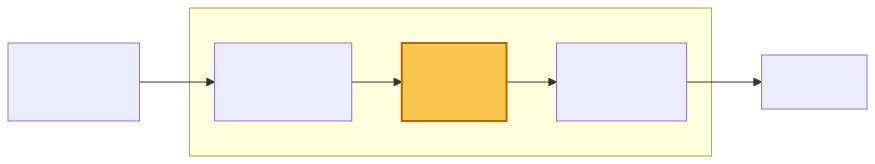

In [ ]:
#@title 🧜‍♀️ Prozess-Diagramm { display-mode: "form" }

diagram = """
flowchart LR
    Input["Input<br/>(Message)"] --> Prompt

    subgraph Chain
        Prompt["Prompt<br/>(Template)"]
        Model["Model<br/>(LLM)"]
        Response["Response<br/>(Parser)"]
        Prompt --> Model --> Response
    end

    Response --> Result["Result"]

    %% HIGHLIGHT einer einzelnen Box
    style Model fill:#f9c74f,stroke:#b36b00,stroke-width:2px

"""
mermaid(diagram)

LangChain ist mit zahlreichen LLMs – sowohl eines als auch verschiedener Anbieter – kompatibel und bietet vielseitige Konfigurationsoptionen für individuelle Anwendungsfälle.

<p><font color='black' size="5">

Model-Provider `OpenAI`
</font></p>

**Beispiel `gpt-4o` und `gpt-5-mini`**

+ gpt-4o:    
gpt-4o ist ein multimodales KI-Modell von OpenAI, das Text- und Bildeingaben verarbeiten kann und sich durch hohe Geschwindigkeit sowie eine natürliche, menschenähnliche Interaktion auszeichnet – ideal für alltägliche Konversationen, kreative Aufgaben und allgemeine Chatanwendungen
+ gpt-5-mini:     
gpt-5-mini ist die mittlere Modellvariante der GPT-5-Familie, die ein ausgewogenes Verhältnis zwischen Leistungsfähigkeit und Kosten bietet und für alltägliche Aufgaben, allgemeine Automatisierung sowie kostengünstige Anwendungen im großen Maßstab optimiert wurde

In [ ]:
# Modelle konfigurieren (Kurznotation: "provider:model")
chat_model = init_chat_model("openai:gpt-4o")
resoning_model = init_chat_model("openai:gpt-5-mini")

In [ ]:
# Gemeinsamer simple prompt
prompt = "Was ist der Unterschied zwischen Prompting und Retrieval-Augmented-Generation?"

In [ ]:
# Aufruf
response = chat_model.invoke(prompt)

In [ ]:
mprint("## 📣 Chat-Model:")
mprint("---")
mprint(response.content)

## 📣 Chat-Model:

---

Prompting und Retrieval-Augmented Generation (RAG) sind zwei verschiedene Ansätze, die im Bereich der künstlichen Intelligenz und insbesondere bei Sprachmodellen genutzt werden, um relevante und kontextspezifische Antworten zu generieren. Hier sind die Hauptunterschiede:

1. **Prompting**:

   - **Definition**: Prompting bezieht sich auf die Technik, bei der ein Sprachmodell durch Vorgabe eines spezifischen Eingabeprompts angeregt wird, eine bestimmte Art von Antwort oder Text zu generieren.
   - **Arbeitsweise**: Der Benutzer formuliert einen Text oder eine Frage, der bzw. die als Eingabeprompt dient, und das Sprachmodell generiert basierend auf diesem Prompt eine Antwort.
   - **Datenbasis**: Das Modell stützt sich dabei ausschließlich auf die internen, während des Trainings gelernten Informationen.
   - **Anwendungsbereich**: Prompting kann genutzt werden, um spezifische Informationen abzurufen oder das Modell in gewisser Weise zu steuern, z.B. um Geschichten zu generieren, Fragen zu beantworten oder einfache logische Schlüsse zu ziehen.

2. **Retrieval-Augmented Generation (RAG)**:

   - **Definition**: RAG kombiniert die Fähigkeit, relevante externe Informationen aus einer großen Datenbank oder Wissensbasis abzurufen, mit der Textgenerierung.
   - **Arbeitsweise**: Dieser Ansatz verwendet ein duales System: Ein Retrieval-Modul sucht zunächst relevante Dokumente oder Informationen aus einer externen Datenquelle und leitet diese Informationen dann an ein Sprachmodell weiter, das eine kohärente und fundierte Antwort generiert.
   - **Datenbasis**: RAG nutzt sowohl das vorab trainierte Sprachmodell als auch externe, aktualisierte Wissensbasen, um Informationen bereitzustellen.
   - **Anwendungsbereich**: Besonders nützlich in dynamischen Wissensdomänen, in denen aktuelle Informationen erforderlich sind oder wo das Modell über Informationen hinausgehen muss, die es während seines Trainings gelernt hat.

Zusammengefasst dient Prompting dazu, Sprachmodelle direkt mit spezifischen Eingabesignalen zu steuern, während RAG die Generierungsfähigkeiten von Sprachmodellen mit einem vorgelagerten Schritt des gezielten Abrufens von Informationen kombiniert, um fundiertere und kontextuell relevantere Antworten zu liefern.

In [ ]:
# Aufruf
response = resoning_model.invoke(prompt)

In [ ]:
mprint("## 📣 Reasoning-Model:")
mprint("---")
mprint(response.content)

## 📣 Reasoning-Model:

---

Kurzantwort
- Prompting: Man gibt dem Sprachmodell nur Eingabetext (Prompt) und das Modell erzeugt eine Antwort allein aus seinem trainierten Wissen und der im Prompt bereitgestellten Instruktion/Kontext.
- Retrieval‑Augmented Generation (RAG): Man ergänzt das Prompting dadurch, dass vor der Generierung relevante externe Dokumente oder Abschnitte abgerufen (retrieved) und als zusätzliche Kontexteingabe in das Modell eingespeist werden — das Ergebnis ist also „grounded“ in externen Quellen.

Was ist Prompting?
- Beschreibung: Direkte Interaktion mit dem LLM durch sorgfältig formulierte Prompts, ggf. mit System- und Few‑Shot‑Beispielen, Chain‑of‑Thought-Anweisungen, Temperatur‑Einstellungen etc.
- Wissensquelle: ausschließlich das im Modell gespeicherte Wissen + Input im Prompt.
- Vorteile: sehr einfach zu implementieren, geringe Systemkomplexität, niedrige Latenz.
- Nachteile: beschränkt durch das Modellwissen (Cutoff/Veraltetheit), Neigung zu Halluzinationen, limitiertes Kontextfenster.

Was ist RAG?
- Beschreibung: Pipeline aus (1) Retriever: Suche nach relevanten Dokumenten/Abschnitten in einer externen Wissensbasis (z. B. Vektor‑Embeddings + ANN‑Index, oder klassische IR), (2) Optionaler Reranker/Filter, (3) Generator: LLM erhält Prompt plus die abgerufenen Texte und generiert die Antwort.
- Wissensquelle: externe Dokumente + Modell.
- Vorteile: bessere Faktenbasis, aktualisierbar ohne Neutraining, geringere Halluzinationsrate bei korrekter Integration, handhabbar großer Wissensmengen jenseits des Kontextfensters.
- Nachteile: mehr Systemkomponenten, höhere Latenz und Kosten, benötigt guten Retriever/Chunking und Prompt‑Design, Risiko von „context leakage“ oder falscher Attribution wenn Retrieval fehlerhaft.

Vergleich nach Kriterien
- Faktentreue: RAG > reines Prompting (wenn Retrieval korrekt).
- Aktualität: RAG (externe DB aktualisierbar) > Prompting (modellbedingt veraltet).
- Implementationsaufwand: Prompting (niedrig) < RAG (höher).
- Kosten & Latenz: Prompting (niedriger) < RAG (höher, wegen Retrieval und längerer Prompts).
- Skalierbarkeit des Wissens: RAG skaliert gut (große Dokumentkorpora); Prompting nicht.
- Erklärbarkeit/Attribution: RAG ermöglicht Quellenangabe; Prompting nicht zuverlässig.

Kurzes Beispiel
- Prompting (einfach): „Erkläre die Ursachen des Treibhauseffekts in einfachen Worten.“
- RAG (Pipeline): Retriever holt aus einer wissenschaftlichen Wissensdatenbank drei relevante Abschnitte, dann Prompt an LLM: „Nutze die folgenden Quellen (A, B, C) und erläutere die Ursachen des Treibhauseffekts; gib jeweils die Quelle an.“ → Antwort basiert auf den abgerufenen Textstellen.

Typische Komponenten einer RAG‑Implementierung
- Wissensspeicher: Dokumente in Chunks (z. B. 500–2000 Tokens).
- Embeddings/Index: semantische Vektoren + ANN‑Index (FAISS, Milvus, Pinecone, etc.).
- Retriever: top‑k semantische Suche (+optional BM25).
- Reranker: ML‑basiert oder Heuristiken für bessere Precision.
- Generator‑Prompting: Template, das die abgerufenen Snippets strukturiert einbettet.
- Evaluation: Genauigkeit, Halluzinationsrate, Antwortzeit.

Wann welches wählen?
- Reines Prompting: Prototyping, kreative Aufgaben, generelle Konversation, wenn keine aktuellen/fakten Daten nötig.
- RAG: Anwendungen, die faktische Genauigkeit, Nachvollziehbarkeit oder aktuelle/unternehmensspezifische Informationen brauchen (Support‑Bots, Wissensmanagement, Rechercheassistenz).

Risiken und Best Practices bei RAG
- Gute Chunk‑Größe wählen, irrelevante Matches filtern, Reranker nutzen.
- Prompts so gestalten, dass das Modell Quellen zitiert und bei fehlender Info „weißes Blinken“ (kein Erfinden) macht.
- Zugriffskontrollen und Datenschutz für interne Dokumente beachten.
- Monitoring: Metriken für Halluzinationen und Quellenkonsistenz.

Fazit
Prompting ist die einfache, direkte Nutzung des LLM; RAG erweitert das Modell durch Retrieval externer, aktualisierbarer Quellen und verbessert damit die Faktentreue und Nachvollziehbarkeit — auf Kosten von Komplexität, Latenz und Implementationsaufwand. Welche Methode sinnvoll ist, hängt vom Anwendungsfall (Faktenbedarf, Aktualität, Budget, Entwicklungsaufwand) ab.

**📊 Vergleich: Chat-Modell vs. Reasoning-Modell**

| **Aspekt**                      | **Chat-Modell**                                                           | **Reasoning-Modell**                                                                                |
| ------------------------------- | ------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| **Stil**                        | Erklärend, klassisch strukturiert mit Fließtext                           | Punktuell, technisch und systematisch                                                               |
| **Formatierung**                | Fließtext mit Absätzen und Beispielen                                     | Aufzählungen (•) und strukturierte Unterpunkte                                                      |
| **Definition Prompting**        | Kurze Definition als Text, danach Beispiel                                | Technisch klar: „parametrisches Wissen“, Rolle der Prompt-Formulierung betont                       |
| **Definition RAG**              | Fließtext-Erklärung mit Ablaufbeschreibung und Beispiel                   | Detaillierte Schritte: Abruf, Kontextintegration, Vorteile bzgl. Aktualität und Präzision erläutert |
| **Beispiele**                   | Ja – einfache, praxisnahe Beispiele (z. B. Klimawandel, Quantencomputing) | Nein – keine konkreten Beispiele, aber kontextbezogene Beschreibung                                 |
| **Vergleich Prompting vs. RAG** | Abstrakte Gegenüberstellung in einem abschließenden Absatz                | Direkter Vergleich im letzten Abschnitt mit Betonung der Wissensquellen                             |
| **Technische Tiefe**            | Mittel – für Einsteiger\:innen gut verständlich                           | Hoch – Begriffe wie „parametrisches Wissen“, Fokus auf Architektur                                  |
| **Zielgruppe**                  | Allgemeines Publikum, Einstieg in das Thema                               | Fortgeschrittene Nutzer\:innen, Technik-affine Leserschaft                                          |
| **Stärken des Modells**         | Klare Erklärung, gute didaktische Struktur                                | Präzise Begriffsabgrenzung, hohe Informationsdichte                                                 |



<p><font color='black' size="5">

Modell-Provider: `Google`
</font></p>

LangChain bietet eine robuste und einfache Integration mit Google Gemini, einschließlich des leistungsfähigen Modells `gemini-2.5-pro`. Dieses Modell zeichnet sich durch ein sehr großes Kontextfenster mit multimodaler Verarbeitung (Text, Bild, Audio, Video) und starke Reasoning-Fähigkeiten aus. Für den Zugang benötigen Sie einen kostenlosen API-Key, den Sie über Google AI Studio oder die Google Cloud Console erhalten können. Mit dem offiziellen LangChain-Paket langchain-google-genai lässt sich Gemini nahtlos in Python-Anwendungen einbinden.

In [ ]:
install_packages([('langchain-google-genai', 'langchain_google_genai')])
setup_api_keys(['GOOGLE_API_KEY'])

🔄 Installiere langchain-google-genai...
✅ langchain-google-genai erfolgreich installiert und importiert
✓ GOOGLE_API_KEY erfolgreich gesetzt


In [ ]:
llm_gemini = init_chat_model("google_genai:gemini-2.5-flash-lite", temperature=0)

In [ ]:
prompt = (
    "Was ist der Unterschied zwischen Prompting und Retrieval-Augmented-Generation?"
    "Zuerst, **schreibe deine Gedankenschritte unter einer Überschrift 'Reasoning' auf**, "
    "und gib dann die endgültige Antwort aus."
)
response_gemini = llm_gemini.invoke(prompt)

In [ ]:
mprint("### 📣 Antwort:")
mprint("---")
mprint(response_gemini.content)

### 📣 Antwort:

---

## Reasoning

1.  **Verständnis der Kernkonzepte:**
    *   **Prompting:** Was bedeutet es, ein Sprachmodell zu "prompten"? Es geht darum, eine Eingabe (Text, Frage, Anweisung) zu geben, um eine gewünschte Ausgabe zu erhalten. Der Prompt ist die direkte Anweisung oder der Kontext, den das Modell erhält.
    *   **Retrieval-Augmented Generation (RAG):** Was ist das? Der Name selbst gibt Hinweise: "Retrieval" (Abrufen) und "Augmented Generation" (erweiterte Generierung). Das bedeutet, dass vor der eigentlichen Generierung Informationen abgerufen werden, um die Generierung zu verbessern.

2.  **Identifizierung der Hauptunterschiede:**
    *   **Informationsquelle:** Woher bezieht das Modell seine Informationen?
        *   Beim reinen Prompting verlässt sich das Modell auf sein *internes, vortrainiertes Wissen*.
        *   Bei RAG bezieht das Modell *zusätzlich externe, spezifische Informationen* aus einer Wissensdatenbank oder einem Dokumentenkorpus.
    *   **Prozess:** Wie funktioniert jeder Ansatz?
        *   Prompting: Eingabe -> Modell -> Ausgabe. Ein direkter Prozess.
        *   RAG: Eingabe -> Retrieval-System (sucht relevante Infos) -> Kombinierte Eingabe (Prompt + abgerufene Infos) -> Modell -> Ausgabe. Ein mehrstufiger Prozess.
    *   **Ziel/Zweck:** Warum würde man einen Ansatz dem anderen vorziehen?
        *   Prompting: Für allgemeine Fragen, kreatives Schreiben, Zusammenfassungen von bekannten Themen, wo das vortrainierte Wissen ausreicht.
        *   RAG: Für Fragen, die spezifisches, aktuelles oder domänenspezifisches Wissen erfordern, das nicht im ursprünglichen Trainingsdatensatz des Modells enthalten war. Um Halluzinationen zu reduzieren und die Genauigkeit zu erhöhen.
    *   **Komplexität:** Welcher Ansatz ist aufwendiger zu implementieren?
        *   Prompting: Relativ einfach, erfordert nur die Formulierung des Prompts.
        *   RAG: Komplexer, erfordert ein Retrieval-System (z.B. Vektordatenbank, Suchindex) und eine Strategie zur Integration der abgerufenen Informationen in den Prompt.

3.  **Strukturierung der Antwort:**
    *   Beginne mit einer klaren Definition jedes Konzepts.
    *   Hebe die Kernunterschiede hervor, indem du die oben identifizierten Punkte (Informationsquelle, Prozess, Zweck) ansprichst.
    *   Verwende Analogien, falls hilfreich (z.B. Prompting ist wie ein Experte, der aus dem Gedächtnis spricht; RAG ist wie ein Experte, der zuerst in Büchern nachschlägt).
    *   Fasse die Hauptunterschiede in einer prägnanten Zusammenfassung zusammen.

4.  **Formulierung der endgültigen Antwort:**
    *   Stelle sicher, dass die Sprache klar und verständlich ist.
    *   Verwende Fachbegriffe korrekt.
    *   Beantworte die Frage direkt: "Was ist der Unterschied?"

---

## Endgültige Antwort

Der Hauptunterschied zwischen **Prompting** und **Retrieval-Augmented Generation (RAG)** liegt in der **Informationsquelle**, die das Sprachmodell für die Generierung seiner Antwort nutzt.

Hier ist eine Aufschlüsselung:

**1. Prompting (Reines Prompting)**

*   **Definition:** Beim reinen Prompting gibst du dem Sprachmodell eine Eingabe (einen "Prompt"), die eine Frage, eine Anweisung oder einen Kontext darstellt. Das Modell generiert dann eine Antwort, indem es sich ausschließlich auf sein **internes, vortrainiertes Wissen** stützt, das es während seines Trainingsprozesses erworben hat.
*   **Informationsquelle:** Das vortrainierte Wissen des Modells.
*   **Prozess:** Direkte Eingabe -> Modell -> Ausgabe.
*   **Anwendungsfälle:** Allgemeine Fragen, kreatives Schreiben, Zusammenfassungen bekannter Themen, Aufgaben, bei denen das Modell keine spezifischen, externen oder aktuellen Informationen benötigt.
*   **Einschränkungen:** Kann zu "Halluzinationen" führen (Erfinden von Fakten), wenn das interne Wissen unvollständig oder veraltet ist. Kann keine Informationen liefern, die nicht Teil des Trainingsdatensatzes waren.

**2. Retrieval-Augmented Generation (RAG)**

*   **Definition:** RAG ist ein fortgeschrittenerer Ansatz, bei dem das Sprachmodell **zusätzlich zu seinem internen Wissen externe Informationen abruft**, um seine Generierung zu verbessern. Bevor das Modell eine Antwort generiert, wird ein "Retrieval"-Schritt durchgeführt, um relevante Dokumente, Textpassagen oder Daten aus einer externen Wissensquelle (z.B. einer Datenbank, einem Dokumentenkorpus, dem Internet) zu finden. Diese abgerufenen Informationen werden dann zusammen mit dem ursprünglichen Prompt an das Sprachmodell übergeben.
*   **Informationsquelle:**
    *   Das interne, vortrainierte Wissen des Modells.
    *   **Zusätzlich:** Spezifische, externe Informationen, die durch einen Retrieval-Mechanismus gefunden wurden.
*   **Prozess:**
    1.  Benutzer gibt einen Prompt ein.
    2.  Ein **Retrieval-System** sucht in einer externen Wissensquelle nach relevanten Informationen basierend auf dem Prompt.
    3.  Die gefundenen Informationen werden mit dem ursprünglichen Prompt kombiniert.
    4.  Das Sprachmodell erhält diese **erweiterte Eingabe** und generiert die Antwort.
    5.  Modell -> Ausgabe.
*   **Anwendungsfälle:** Beantwortung von Fragen zu spezifischen Dokumenten, aktuellen Ereignissen, domänenspezifischem Wissen (z.B. medizinische oder juristische Texte), Reduzierung von Halluzinationen, Bereitstellung von Antworten, die auf verifizierbaren Quellen basieren.
*   **Vorteile:** Erhöht die Genauigkeit, Relevanz und Aktualität der Antworten. Ermöglicht die Nutzung von Wissen, das nicht im ursprünglichen Trainingsdatensatz des Modells enthalten war.

**Zusammenfassend:**

*   **Prompting** ist die grundlegende Interaktion, bei der das Modell nur auf sein eigenes Wissen zurückgreift.
*   **RAG** ist eine Methode, die das Prompting erweitert, indem sie das Modell mit externen, relevanten Informationen "füttert", bevor es die Antwort generiert, um die Qualität und Genauigkeit zu verbessern.

<p><font color='black' size="5">

Ein anderer Modell-Provider: `Alibaba/groq`
</font></p>

`Qwen3-32B` ist ein 32,8 Milliarden Parameter starker Transformer von Alibaba (Qwen3-Serie, April 2025), der durch Dual-Mode-Reasoning glänzt: "Thinking Mode" für komplexe Logik, Mathe und Coding; "Non-Thinking Mode" für schnelle Dialoge

In [ ]:
install_packages([('langchain-groq', 'langchain_groq')])
setup_api_keys(['GROQ_API_KEY'])

🔄 Installiere langchain-groq...
✅ langchain-groq erfolgreich installiert und importiert
✓ GROQ_API_KEY erfolgreich gesetzt


In [ ]:
# Kurznotation: "provider:model"
llm_groq = init_chat_model("groq:qwen/qwen3-32b", temperature=0)

In [ ]:
prompt = (
    "Was ist der Unterschied zwischen Prompting und Retrieval-Augmented-Generation?"
    "Zuerst, **schreibe deine Gedankenschritte unter einer Überschrift 'Reasoning' auf**, "
    "und gib dann die endgültige Antwort aus."
)
response_groq = llm_groq.invoke(prompt)

<p><font color='black' size="5">
Separater Ausweis Reasoning möglich
</font></p>

In [ ]:
from genai_lib.utilities import extract_thinking
thinking, answer = extract_thinking(response_groq)

mprint("### 🧠 Denken:")
mprint("---")
mprint(thinking)
mprint("### 📣 Antwort:")
mprint("---")
mprint(answer)

### 🧠 Denken:

---

Okay, I need to explain the difference between Prompting and Retrieval-Augmented Generation (RAG). Let me start by recalling what each term means.

Prompting is when you give a model a specific input, like a question or instruction, and it generates a response based on its training data. The model uses its internal knowledge to answer, right? So it's all about how the input is structured to get the desired output.

Now, Retrieval-Augmented Generation. I remember that RAG combines retrieval from an external database with the model's generation. So when a query comes in, the system first retrieves relevant documents or information from a database, then uses that retrieved info to generate a more accurate or up-to-date response. It's like the model isn't just relying on its own knowledge but also looking up current data.

Wait, so the key difference is that prompting uses the model's existing knowledge, while RAG adds an external retrieval step. Prompting is about how you phrase the input to get the model to use what it knows. RAG enhances the model's response by fetching additional information from an external source before generating the answer.

Let me check if I got that right. Prompting is about the input structure to elicit the model's knowledge. RAG is a method where the model retrieves external information to augment its generation. So RAG is a specific technique that uses retrieval to improve the generation process, whereas prompting is a broader concept about how inputs are designed to get the model to perform a task.

Another point: Prompting can be as simple as asking a question, while RAG involves a two-step process—retrieval followed by generation. Also, RAG can provide more accurate or updated information because it's not limited to the model's training data. Prompting might not have access to the latest data if the model's training data is outdated.

So summarizing, the main differences are in the process (prompting is input design, RAG includes retrieval), the source of information (model's knowledge vs. external data), and the potential for up-to-date information with RAG.

### 📣 Antwort:

---

**Reasoning**  
Prompting bezieht sich auf die Methode, wie ein KI-Modell durch gezielte Eingaben (Prompts) angeregt wird, auf Basis seines trainierten Wissens eine Antwort zu generieren. Das Modell nutzt ausschließlich seine internen Kenntnisse, die während der Trainingsphase erlernt wurden. Prompting ist also ein reiner Input-Output-Prozess, bei dem die Qualität der Antwort von der Formulierung des Prompts und dem Modellwissen abhängt.  

Retrieval-Augmented Generation (RAG) hingegen kombiniert zwei Schritte: Zunächst wird relevante Information aus einer externen Datenbank oder einem Dokumentenspeicher abgerufen (Retrieval), und anschließend wird diese Information vom Modell genutzt, um eine Antwort zu generieren. RAG erweitert das Modellwissen durch aktuelle oder spezifische Daten, die nicht zwangsläufig Teil des Trainingsdatensatzes waren.  

**Unterschiede im Überblick:**  
1. **Quelle des Wissens:** Prompting nutzt nur das interne Wissen des Modells, RAG integriert externe Daten.  
2. **Prozess:** Prompting ist ein einstufiger Prozess, RAG besteht aus Retrieval und anschließender Generation.  
3. **Aktualität:** RAG kann aktuelle oder spezialisierte Informationen liefern, Prompting ist auf das Trainingsdatum des Modells beschränkt.  

**Endgültige Antwort**  
Der Unterschied zwischen Prompting und Retrieval-Augmented Generation (RAG) liegt in der Quelle des Wissens und dem Prozess:  
- **Prompting** nutzt ausschließlich das interne Wissen des Modells, um auf Basis eines Prompts eine Antwort zu generieren.  
- **RAG** fügt einen Retrieval-Schritt hinzu, bei dem externe Dokumente oder Datenbanken abgefragt werden, um die Antwort zu ergänzen oder zu verbessern. RAG ermöglicht so präzisere, aktuelle oder spezialisierte Antworten, während Prompting auf das Trainingswissen des Modells angewiesen ist.

# 7 | Chain 📌
---

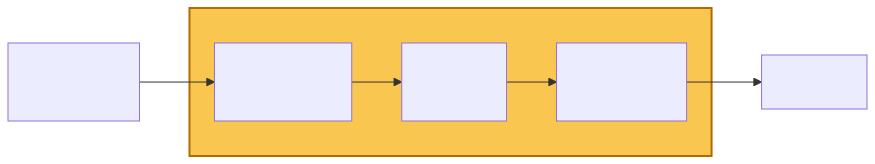

In [ ]:
#@title 🧜‍♀️ Prozess-Diagramm { display-mode: "form" }

diagram = """
flowchart LR
    Input["Input<br/>(Message)"] --> Prompt

    subgraph Chain
        Prompt["Prompt<br/>(Template)"]
        Model["Model<br/>(LLM)"]
        Response["Response<br/>(Parser)"]
        Prompt --> Model --> Response
    end

    Response --> Result["Result"]

    %% HIGHLIGHT einer einzelnen Box
    style Chain fill:#f9c74f,stroke:#b36b00,stroke-width:2px

"""
mermaid(diagram)

Chains verbinden mehrere Komponenten/Bausteine zu einer Verarbeitungskette. LangChain Expression Language (LCEL) ist das **neue Programmiermodell in LangChain v0.3+**, das die Entwicklung von LLM-Anwendungen vereinfacht.



**Hier die Kernpunkte:**

1. Was ist LCEL?
```python
# LCEL nutzt den Pipe-Operator (|) für klare Verkettungen
chain = prompt | model
```
- Eine deklarative Sprache zum Verketten von LangChain-Komponenten
- Ermöglicht linearen Datenfluss zwischen Komponenten
- Basiert auf dem Pipe-Operator (|) für intuitive Verbindungen

2. Warum LCEL nutzen?
- Bessere Lesbarkeit des Codes
- Einfachere Wartung und Debugging
- Verbesserte Performance durch optimierte Ausführung
- Bessere Typsicherheit und Fehlererkennung
- Unterstützt modernes Streaming und Async-Operationen

3. Praktisches Beispiel:

<p><font color='black' size="5">
Simple Chain 📌
</font></p>


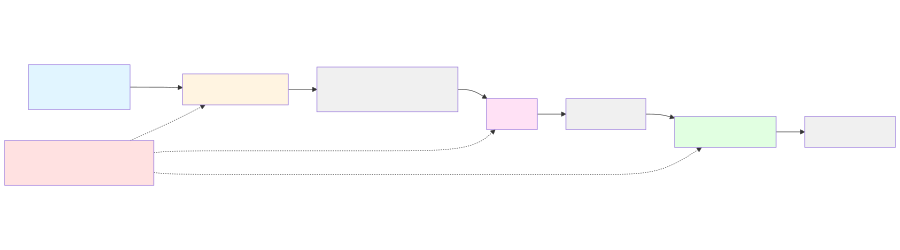

In [ ]:
#@markdown   <p><font size="4" color='green'>   Mermaid - LCEL Chain-Komposition</font> </br></p>

diagram = """
graph LR
    A["Input Dictionary<br/>{user_input: ...}"] --> B["Prompt Template"]
    B --> C["Formatierter Prompt<br/>System + Human Message"]
    C --> D["LLM"]
    D --> E["AI Message"]
    E --> F["StrOutputParser"]
    F --> G["String Output"]

    H["chain = prompt | llm | parser"] -.-> B
    H -.-> D
    H -.-> F

    style A fill:#e1f5ff
    style B fill:#fff4e1
    style C fill:#f0f0f0
    style D fill:#ffe1f5
    style E fill:#f0f0f0
    style F fill:#e1ffe1
    style G fill:#f0f0f0
    style H fill:#ffe1e1
"""
mermaid(diagram, width=900, height=250)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

# 1. Prompt-Template
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher und humorvoller Assistent."),
    ("human", "Erkläre mir {user_input}")
])

# 2. Modell (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0)

#  3. Einfache LCEL-Kette
chain = prompt | llm

# 4. Ausführung
response = chain.invoke({"user_input": "LangChain Expression Language"})

In [ ]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

LangChain Expression Language (LCEL) ist eine spezielle Sprache, die in der LangChain-Bibliothek verwendet wird, um komplexe Datenverarbeitungs- und Abfrageoperationen zu vereinfachen. LangChain selbst ist ein Framework, das Entwicklern hilft, Anwendungen zu erstellen, die auf Sprachmodellen basieren, und LCEL ist ein Teil davon, der es ermöglicht, mit Daten in einer flexiblen und ausdrucksstarken Weise zu interagieren.

Hier sind einige der Hauptmerkmale und Konzepte von LCEL:

1. **Ausdrucksbasierte Syntax**: LCEL verwendet eine ausdrucksbasierte Syntax, die es Entwicklern ermöglicht, komplexe Abfragen und Transformationen auf Daten durchzuführen, ohne sich mit der zugrunde liegenden Logik auseinandersetzen zu müssen.

2. **Integration mit Sprachmodellen**: LCEL ist so konzipiert, dass es nahtlos mit Sprachmodellen interagiert. Das bedeutet, dass du die Ausdruckssprache verwenden kannst, um Anfragen an ein Sprachmodell zu formulieren und die Antworten zu verarbeiten.

3. **Flexibilität**: Die Sprache ist flexibel und ermöglicht es, verschiedene Datentypen und -strukturen zu verarbeiten. Du kannst mit Listen, Dictionaries und anderen Datenstrukturen arbeiten, um die gewünschten Ergebnisse zu erzielen.

4. **Einfache Integration**: LCEL lässt sich leicht in bestehende LangChain-Anwendungen integrieren, was es Entwicklern erleichtert, die Funktionalität ihrer Anwendungen zu erweitern.

5. **Beispielanwendungen**: Du kannst LCEL verwenden, um Daten zu filtern, zu transformieren oder zu aggregieren, was besonders nützlich ist, wenn du mit großen Datenmengen arbeitest oder spezifische Informationen aus einem Text extrahieren möchtest.

Wenn du mehr über spezifische Funktionen oder Anwendungsfälle von LCEL erfahren möchtest, lass es mich wissen! Und keine Sorge, ich verspreche, nicht zu viele technische Begriffe zu verwenden – ich bin hier, um zu helfen, nicht um dich zu verwirren! 😄


LCEL ist der empfohlene Weg für alle neuen LangChain-Projekte, da es die Entwicklung vereinfacht und zukunftssicher macht.

# 8 | Output-Handling
---

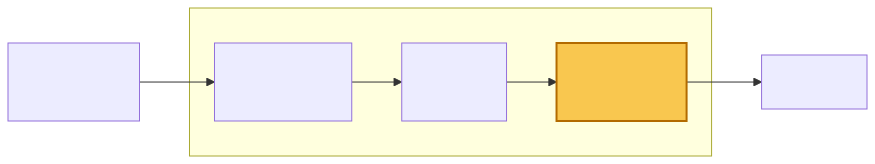

In [ ]:
#@title 🧜‍♀️ Prozess-Diagramm { display-mode: "form" }

diagram = """
flowchart LR
    Input["Input<br/>(Message)"] --> Prompt

    subgraph Chain
        Prompt["Prompt<br/>(Template)"]
        Model["Model<br/>(LLM)"]
        Response["Response<br/>(Parser)"]
        Prompt --> Model --> Response
    end

    Response --> Result["Result"]

    %% HIGHLIGHT einer einzelnen Box
    style Response fill:#f9c74f,stroke:#b36b00,stroke-width:2px

"""
mermaid(diagram)

# 8.1 | OutputParser 📌

Ein OutputParser ist ein Konzept in LangChain, das hilft, die Antworten eines Modells richtig weiterzuverarbeiten. Es nimmt die **rohe Ausgabe** (zum Beispiel einen langen Text) und formt sie in ein **bestimmtes Format**, das später in der Anwendung leichter benutzt werden kann.

<p><font color='black' size="5">
Simple Chain mit Parser 📌
</font></p>

In [ ]:
# 1. Prompt-Template
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher und humorvoller Assistent."),
    ("human", "Erkläre mir {user_input}")
])

# 2. Modell (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0)

# 3. Parser
parser = StrOutputParser()

# 4. Einfache LCEL-Kette
chain = prompt | llm | parser

# 5. Ausführung
response = chain.invoke({"user_input": "LangChain Expression Language"})

In [ ]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response)

## 📣 Model response:

---

LangChain Expression Language (LCEL) ist eine spezielle Sprache, die in der LangChain-Bibliothek verwendet wird, um komplexe Datenverarbeitungs- und Abfrageoperationen zu vereinfachen. LangChain selbst ist ein Framework, das Entwicklern hilft, Anwendungen mit Sprachmodellen zu erstellen, indem es verschiedene Komponenten wie Datenquellen, Agenten und Chain-Logik integriert.

Hier sind einige der Hauptmerkmale und Konzepte von LCEL:

1. **Ausdrücke**: LCEL ermöglicht es, Ausdrücke zu definieren, die auf Daten angewendet werden können. Diese Ausdrücke können einfache Berechnungen, Filter oder komplexe Transformationen umfassen.

2. **Variablen**: In LCEL können Variablen verwendet werden, um Werte zu speichern und wiederzuverwenden. Dies erleichtert die Handhabung von Daten und die Erstellung dynamischer Abfragen.

3. **Funktionen**: LCEL unterstützt die Definition und Verwendung von Funktionen, die wiederverwendbare Logik kapseln. Dies ist besonders nützlich, um häufige Operationen zu abstrahieren und den Code sauberer und wartbarer zu gestalten.

4. **Integration mit Sprachmodellen**: LCEL ist so konzipiert, dass es nahtlos mit Sprachmodellen interagiert. Das bedeutet, dass du die Ausdruckssprache nutzen kannst, um die Eingaben und Ausgaben von Sprachmodellen zu steuern und zu verarbeiten.

5. **Flexibilität**: Die Sprache ist flexibel und anpassbar, sodass Entwickler sie an ihre spezifischen Anforderungen anpassen können. Das macht sie zu einem leistungsstarken Werkzeug für die Entwicklung von KI-Anwendungen.

Um es humorvoll zu sagen: Wenn LCEL ein Kochrezept wäre, dann wäre es das geheime Gewürz, das deinem Gericht den besonderen Pfiff verleiht – es macht die Zubereitung einfacher und das Endergebnis köstlicher! 🍽️

Wenn du spezifische Fragen zu LCEL hast oder mehr über bestimmte Aspekte wissen möchtest, lass es mich wissen!

<p><font color='black' size="5">
Simple Chain mit Parser & Format im System-Prompt
</font></p>

In [ ]:
# 1. Einfacher Prompt mit explizite Formatvorgabe
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher Assistent. Formatiere Deine Antwort im json-Format mit den Infos zu Name und Alter."),
    ("human", "{user_input}")
])

# 2. Modell (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0)

# 3. Parser
parser = StrOutputParser()

# 4. Chain
chain = prompt | llm | parser

# 5. Ausführung
response = chain.invoke({"user_input": "Bitte gibt den Namen einer fiktiven Person und das Alter"})

In [ ]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response)

## 📣 Model response:

---

```json
{
  "Name": "Maximilian Müller",
  "Alter": 28
}
```

# 8.2 | with_structured_output() ✳️


Im vorherigen Beispielen wurden Formatierung über **System-Prompts** und/oder über einen **OututParser** gesteuert. Das funktioniert, hat aber Nachteile:

- ❌ Keine automatische Validierung (Typen können falsch sein)
- ❌ String-Parsing fehleranfällig
- ❌ Keine Typsicherheit im Code
- ❌ Prompt-Engineering für Format nötig

**Moderne Lösung: `with_structured_output()`**

LangChain 1.0+ bietet eine elegante Lösung: Mit `with_structured_output()` kann man die gewünschte Ausgabestruktur **direkt als Pydantic-Modell** definieren. Das Modell sorgt automatisch für:

- ✅ Validierte, typsichere Ausgaben
- ✅ Automatische Format-Konvertierung
- ✅ Klare Struktur ohne Prompt-Engineering
- ✅ IDE-Unterstützung (Autocomplete, Type-Hints)

<p><font color='black' size="5">
Einfaches Beispiel mit with_structured_output()
</font></p>

In [ ]:
from pydantic import BaseModel, Field

# 1. Pydantic-Modell definiert die gewünschte Struktur
class PersonInfo(BaseModel):
    """Informationen über eine Person"""
    name: str = Field(description="Vollständiger Name der Person")
    alter: int = Field(description="Alter der Person in Jahren")
    beruf: str = Field(description="Aktueller Beruf der Person")

# 2. Modell mit strukturierter Ausgabe (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0)
structured_llm = llm.with_structured_output(PersonInfo)

# 3. Einfache Anfrage - automatische Formatierung & Validierung
response = structured_llm.invoke(
    "Erstelle eine fiktive Person: Name, Alter und Beruf"
)

# 4. Typsichere Ausgabe - response ist ein PersonInfo-Objekt
print(f"Typ: {type(response)}")
print(f"Name: {response.name}")
print(f"Alter: {response.alter}")
print(f"Beruf: {response.beruf}")

Typ: <class '__main__.PersonInfo'>
Name: Lena Müller
Alter: 28
Beruf: Grafikdesignerin


**Vergleich: Prompt-basierte Formatierung vs. StrOutputParser vs. with_structured_output()**

| Aspekt | Prompt-basiert | StrOutputParser | with_structured_output() |
|--------|----------------|----------------|---------------------------|
| **Definition** | Via System-Prompt: „Formatiere im JSON-Format...“ | Expliziter Parser, der LLM-Ausgabe als String extrahiert oder leicht nachbearbeitet | Automatische Strukturierung per Pydantic-Modell (`class PersonInfo(BaseModel)`) |
| **Validierung** | ❌ Keine – Modell kann beliebig antworten | ⚠️ Nur minimale (z. B. String-Cleaning) | ✅ Strikte Schema-Validierung durch Pydantic |
| **Typsicherheit** | ❌ Nur Strings | ❌ Nur Strings | ✅ Typsichere Python-Objekte |
| **Fehlerbehandlung** | ⚠️ Manuelles Parsing und Regex nötig | ⚠️ Begrenzte Kontrolle (nur einfache Parsing-Fehler) | ✅ Automatische Validierung, Exception bei Schemafehlern |
| **Code-Qualität** | ⚠️ Fragil, stark Prompt-abhängig | ✅ Etwas klarer, aber keine echte Struktur | ✅ Robust, wartbar, klar definierte Typen |
| **IDE-Support** | ❌ Keine Autovervollständigung | ❌ Keine | ✅ Vollständig durch Type-Hints |
| **Anwendungsfall** | Einfache oder explorative Ausgaben | Wenn nur reine Textausgabe nötig ist | Für strukturierte, verlässliche Daten (JSON, Objekte) |
| **Lernkurve** | ✅ Sehr einfach | ✅ Einfach | ⚠️ Erfordert Grundkenntnisse in Pydantic und LangChain-Schemas |
| **Beispiel** | „Nenne Name und Alter als JSON.“ | `StrOutputParser().parse(output)` | `llm.with_structured_output(PersonInfo)` |




**Wann welchen Ansatz?**

- **Prompt-basiert**: Für einfache Texte, Zusammenfassungen, kreative Inhalte  
- **StrOutputParser**: Wenn nur reine Textausgabe oder einfache Formatkorrektur nötig ist  
- **with_structured_output()**: Für strukturierte Daten, APIs, Datenbanken, komplexe Workflows

# 9 | Runnables (opt.)
---


Ein **Runnable** ist ein elementarer Baustein in LangChain. Er nimmt eine Eingabe und liefert eine Ausgabe - wie eine Funktion mit klaren Regeln. Man kann sich Konzepte wie Prompts, LLMs oder Parser als Runnables vorstellen. Runnable kann man als **Oberbegriff** für Prompts, LLMs, Parser und ähnliche Komponenten verwenden.



In der Grafik sieht man die **drei wichtigsten Runnables**: Prompt-Template, LLM und Parser, die zusammen eine Kette bilden.

In LangChain sind die wichtigsten Komponenten als Runnables verfügbar:

+ Prompts/Templates (der erste Baustein in der Kette)
+ LLMs (das Herzstück in der Mitte)
+ Output-Parser (verwandelt die LLM-Antwort in ein nutzbares Format)
+ Komplette Chains (die ganze Verarbeitungskette)
+ Tools (für spezielle Aufgaben)
+ Retriever (holen zusätzliche Informationen)


Vorteile von Runnables:

+ Gleiche Bedienung: Alle Runnables (Prompt, LLM, Parser) funktionieren nach demselben Prinzip
+ Einfaches Verbinden: Man kann sie unkompliziert zu einer Kette zusammenfügen - genau wie im Bild gezeigt
+ Anpassungsfähig: Sie funktionieren sowohl einzeln als auch in der Gruppe
Schrittweise Ausgabe: Ergebnisse können stückweise weitergegeben werden

<p><font color='black' size="5">
Benutzerdefinierte Runnables erstellen
</font></p>

Man kann auch eigene Runnables erstellen, indem man eine Klasse definiert, die das Runnable-Interface implementiert oder eine Funktion mit `RunnableLambda` umsetzt:


In [ ]:
from langchain_core.runnables import RunnableLambda
from langchain_core.output_parsers.string import StrOutputParser

# 1. Mit RunnableLambda eine einfache Transformation erstellen
def text_verdoppeln(eingabe):
    return f"{eingabe} <br> <br>  {eingabe}"

verdoppler = RunnableLambda(text_verdoppeln)

# Verwendung des eigenen Runnables
verdoppler.invoke("Dies ist ein Text.")

'Dies ist ein Text. <br> <br>  Dies ist ein Text.'

In [ ]:
# Einfacher Prompt ohne explizite Formatvorgabe
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher Assistent. Antworte kurz."),
    ("human", "Eingabe: {user_input}")
])

# In eine Kette einbauen - Korrektur der Pipe-Operatoren
chain_mit_verdoppler = prompt | llm | parser | verdoppler

# Test der Kette
response = chain_mit_verdoppler.invoke({"user_input": "Wer war Einstein?"})

In [ ]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response)

## 📣 Model response:

---

Albert Einstein war ein theoretischer Physiker, der für seine Relativitätstheorie bekannt ist. Er wurde 1879 in Deutschland geboren und gilt als einer der bedeutendsten Wissenschaftler des 20. Jahrhunderts. 1921 erhielt er den Nobelpreis für Physik. <br> <br>  Albert Einstein war ein theoretischer Physiker, der für seine Relativitätstheorie bekannt ist. Er wurde 1879 in Deutschland geboren und gilt als einer der bedeutendsten Wissenschaftler des 20. Jahrhunderts. 1921 erhielt er den Nobelpreis für Physik.


<p><font color='black' size="5">
Runnable-Methoden
</font></p>

Jedes Runnable unterstützt standardmäßig folgende Methoden:

1. **invoke()**: Für einzelne, synchrone Anfragen
2. **batch()**: Verarbeitet mehrere Eingaben parallel
3. **stream()**: Gibt Teilergebnisse zurück, sobald sie verfügbar sind
4. **ainvoke()**: Asynchrone Version von invoke
5. **abatch()**: Asynchrone Version von batch
6. **astream()**: Asynchrone Version von stream



Hier ein einfaches Beispiel mit den verschiedenen Aufrufmethoden:


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers.string import StrOutputParser

# Einfaches Template erstellen
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher und humorvoller Assistent."),
    ("human", "{user_input}")
])

# Runnable-Kette erstellen
chain = prompt | llm | parser

In [ ]:
# 1. invoke - Einzelne Anfrage
response = chain.invoke({"user_input": "Was ist ein Runnable in LangChain?"})

mprint("## 📣 Invoke response:")
mprint("---")
mprint(response)

## 📣 Invoke response:

---

In LangChain bezieht sich ein "Runnable" auf ein Konzept, das es ermöglicht, verschiedene Komponenten oder Funktionen in einer Kette von Operationen auszuführen. Es handelt sich dabei um eine abstrahierte Einheit, die eine bestimmte Aufgabe oder eine Reihe von Aufgaben ausführen kann. Runnables sind besonders nützlich, um komplexe Abläufe zu strukturieren und zu organisieren, indem sie es ermöglichen, verschiedene Schritte in einem Prozess zu definieren und zu kombinieren.

Ein Runnable kann beispielsweise eine Funktion sein, die Daten verarbeitet, eine API-Anfrage stellt oder eine andere Art von Berechnung durchführt. In LangChain können Runnables miteinander verkettet werden, sodass die Ausgabe eines Runnables als Eingabe für den nächsten dient. Dies fördert die Modularität und Wiederverwendbarkeit von Code.

Um es mit einem humorvollen Vergleich zu verdeutlichen: Stell dir vor, ein Runnable ist wie ein Koch in einer Küche. Der Koch (Runnable) hat eine spezielle Aufgabe, wie das Schneiden von Gemüse oder das Braten von Fleisch. Wenn du mehrere Köche (Runnables) hast, die zusammenarbeiten, kannst du ein köstliches Gericht (komplexe Anwendung) zubereiten, indem jeder seine Aufgabe erledigt und die Ergebnisse weitergibt. Und am Ende gibt es ein leckeres Ergebnis – oder zumindest weniger verbrannte Pfannen! 🍳😄

In [ ]:
# 2. batch - Mehrere Anfragen parallel
response = chain.batch([
    {"user_input": "Erkläre den Begriff LCEL kurz."},
    {"user_input": "Was sind die Hauptvorteile von Runnables?"}
])
mprint("##  📣 Batch response::")
mprint("---")
for i, ergebnis in enumerate(response, 1):
    mprint(f"Anfrage {i}: {response[:50]}...\n")

##  📣 Batch response::

---

Anfrage 1: ['LCEL steht für "Low Carbon Energy Lab" und bezieht sich auf Einrichtungen oder Initiativen, die sich mit der Forschung, Entwicklung und Umsetzung von Technologien zur Reduzierung von Kohlenstoffemissionen beschäftigen. Diese Labore konzentrieren sich oft auf erneuerbare Energien, Energieeffizienz und innovative Lösungen, um den Übergang zu einer kohlenstoffarmen Wirtschaft zu fördern. Wenn du mehr Details oder spezifische Informationen benötigst, lass es mich wissen!', 'Runnables in Java sind eine praktische Möglichkeit, um Aufgaben in einem separaten Thread auszuführen. Hier sind einige der Hauptvorteile von Runnables:\n\n1. **Thread-Sicherheit**: Runnables ermöglichen es, Aufgaben in einem separaten Thread auszuführen, was die Hauptanwendung nicht blockiert. Das ist besonders nützlich für langwierige Aufgaben, die die Benutzeroberfläche nicht einfrieren lassen sollen.\n\n2. **Einfachheit**: Die Implementierung eines Runnables ist einfach. Man muss lediglich die `run()`-Methode überschreiben und kann dann das Runnable an einen Thread übergeben.\n\n3. **Flexibilität**: Runnables können leicht an verschiedene Threads übergeben werden, was die Wiederverwendbarkeit des Codes erhöht. Man kann dasselbe Runnable in verschiedenen Kontexten verwenden.\n\n4. **Kombinierbarkeit**: Runnables können einfach kombiniert werden, um komplexere Aufgaben zu erstellen. Man kann mehrere Runnables in einem ExecutorService ausführen, um parallele Verarbeitung zu ermöglichen.\n\n5. **Keine Rückgabewerte**: Runnables sind ideal für Aufgaben, die keine Rückgabewerte benötigen. Wenn du einfach nur eine Aufgabe ausführen möchtest, ohne ein Ergebnis zurückzugeben, ist ein Runnable die richtige Wahl.\n\n6. **Leichtgewichtig**: Runnables sind leichtgewichtig im Vergleich zu anderen Ansätzen wie `Callable`, da sie keine Rückgabewerte oder Ausnahmen behandeln müssen.\n\n7. **Integration mit Executor-Framework**: Runnables lassen sich gut in das Executor-Framework integrieren, was die Verwaltung von Threads und die Ausführung von Aufgaben vereinfacht.\n\nUnd wenn du mal einen Thread zum Lachen bringen willst, kannst du ihm ein Runnable geben, das einen Witz erzählt – aber pass auf, dass er nicht vom Lachen umfällt! 😄']...


Anfrage 2: ['LCEL steht für "Low Carbon Energy Lab" und bezieht sich auf Einrichtungen oder Initiativen, die sich mit der Forschung, Entwicklung und Umsetzung von Technologien zur Reduzierung von Kohlenstoffemissionen beschäftigen. Diese Labore konzentrieren sich oft auf erneuerbare Energien, Energieeffizienz und innovative Lösungen, um den Übergang zu einer kohlenstoffarmen Wirtschaft zu fördern. Wenn du mehr Details oder spezifische Informationen benötigst, lass es mich wissen!', 'Runnables in Java sind eine praktische Möglichkeit, um Aufgaben in einem separaten Thread auszuführen. Hier sind einige der Hauptvorteile von Runnables:\n\n1. **Thread-Sicherheit**: Runnables ermöglichen es, Aufgaben in einem separaten Thread auszuführen, was die Hauptanwendung nicht blockiert. Das ist besonders nützlich für langwierige Aufgaben, die die Benutzeroberfläche nicht einfrieren lassen sollen.\n\n2. **Einfachheit**: Die Implementierung eines Runnables ist einfach. Man muss lediglich die `run()`-Methode überschreiben und kann dann das Runnable an einen Thread übergeben.\n\n3. **Flexibilität**: Runnables können leicht an verschiedene Threads übergeben werden, was die Wiederverwendbarkeit des Codes erhöht. Man kann dasselbe Runnable in verschiedenen Kontexten verwenden.\n\n4. **Kombinierbarkeit**: Runnables können einfach kombiniert werden, um komplexere Aufgaben zu erstellen. Man kann mehrere Runnables in einem ExecutorService ausführen, um parallele Verarbeitung zu ermöglichen.\n\n5. **Keine Rückgabewerte**: Runnables sind ideal für Aufgaben, die keine Rückgabewerte benötigen. Wenn du einfach nur eine Aufgabe ausführen möchtest, ohne ein Ergebnis zurückzugeben, ist ein Runnable die richtige Wahl.\n\n6. **Leichtgewichtig**: Runnables sind leichtgewichtig im Vergleich zu anderen Ansätzen wie `Callable`, da sie keine Rückgabewerte oder Ausnahmen behandeln müssen.\n\n7. **Integration mit Executor-Framework**: Runnables lassen sich gut in das Executor-Framework integrieren, was die Verwaltung von Threads und die Ausführung von Aufgaben vereinfacht.\n\nUnd wenn du mal einen Thread zum Lachen bringen willst, kannst du ihm ein Runnable geben, das einen Witz erzählt – aber pass auf, dass er nicht vom Lachen umfällt! 😄']...


In [ ]:
# 3. stream - Schrittweise Ausgabe
mprint("##  📣 Stream response:")
mprint("---")
for chunk in chain.stream({"user_input": "Erkläre die Abkürzung LCEL kurz."}):
    print(chunk, end=" ➡ ")  # Zeichen trennt die via stream gelieferten Ergebnisse/Ausgaben
print("\n")

##  📣 Stream response:

---

 ➡ Die ➡  Ab ➡ k ➡ ür ➡ zung ➡  LC ➡ EL ➡  steht ➡  für ➡  " ➡ Low ➡  Carbon ➡  Energy ➡  Lab ➡ ". ➡  Es ➡  handelt ➡  sich ➡  dabei ➡  um ➡  Einrichtungen ➡  oder ➡  Forschungs ➡ zent ➡ ren ➡ , ➡  die ➡  sich ➡  mit ➡  der ➡  Entwicklung ➡  und ➡  Förderung ➡  von ➡  Technologien ➡  und ➡  Strateg ➡ ien ➡  zur ➡  Red ➡ uz ➡ ierung ➡  von ➡  Koh ➡ len ➡ stoff ➡ em ➡ ission ➡ en ➡  im ➡  Ener ➡ gies ➡ ektor ➡  beschäftigen ➡ . ➡  Wenn ➡  du ➡  mehr ➡  Details ➡  oder ➡  spezif ➡ ische ➡  Informationen ➡  zu ➡  einem ➡  bestimmten ➡  LC ➡ EL ➡  benöt ➡ igst ➡ , ➡  lass ➡  es ➡  mich ➡  wissen ➡ ! ➡  ➡  ➡  ➡ 



# A | Aufgabe
---

Die Aufgabestellungen unten bieten Anregungen, Sie können aber auch gerne eine andere Herausforderung angehen.


<p><font color='black' size="5">
Erstellen einer LangChain-Kette zur Textanalyse
</font></p>

Entwickeln Sie eine Verarbeitungskette, die einen Text analysiert und verschiedene Informationen darüber extrahiert.

**Schritte:**
1. Erstelle ein ChatPromptTemplate, das ein LLM anweist, einen Text zu analysieren
2. Die Analyse soll folgende Aspekte umfassen:
   - Hauptthema des Textes
   - Tonalität (formal, informell, etc.)
   - Schlüsselwörter (5-10)
   - Kurze Zusammenfassung (max. 3 Sätze)
3. Formatiere die Ausgabe strukturiert mit Markdown-Überschriften
4. Teste die Kette mit mindestens zwei verschiedenen Texten


